# Determination of a coordinate system

Marcos Duarte

In mechanics, a [frame of reference](http://en.wikipedia.org/wiki/Frame_of_reference) is the place with respect to we choose to describe the motion of a body. In this reference frame, we define a [coordinate system](http://en.wikipedia.org/wiki/Coordinate_system) (a set of axes) within which we measure the motion of a body (but frame of reference and coordinate system are often used interchangeably).  

In biomechanics, we may use different coordinate systems for convenience and refer to them as global, laboratory, local, anatomical, or technical reference frames or coordinate systems. For example, in a standard gait analysis, we define a global or laboratory coordinate system and a different coordinate system for each segment of the body to be able to describe the motion of a segment in relation to anatomical axes of another segment. To define this anatomical coordinate system, we need to place markers on anatomical landmarks on each segment. We also may use other markers (technical markers) on the segment to improove the motion analysis and then we will also have to define a technical coordinate system for each segment.

As we perceive the surrounding space as three-dimensional, a convenient coordinate system to use is the [Cartesian coordinate system](http://en.wikipedia.org/wiki/Cartesian_coordinate_system) with three ortogonal axes in the [Euclidean space](http://en.wikipedia.org/wiki/Euclidean_space). From [linear algebra](http://en.wikipedia.org/wiki/Linear_algebra), a set of unit linearly independent vectors (orthogonal in the Euclidean space and each with norm (length) equals to one) that can represent any vector via [linear combination](http://en.wikipedia.org/wiki/Linear_combination) is called a <a href="http://en.wikipedia.org/wiki/Basis_(linear_algebra)">basis</a> (or orthonormal basis). The figure below shows a point and its position vector in the Cartesian coordinate system and the corresponding versors (unit vectors) of the basis for this coordinate system. See the notebook [Scalar and vector](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/ScalarVector.ipynb) for a description on vectors.

<div class='center-align'><figure><img src="./../images/vector3Dijk.png" width=300/><figcaption><i>Representation of a point **P** and its position vector **a** in a Cartesian coordinate system. The versors <b>i, j, k</b> form a basis for this coordinate system and are usually represented in the color sequence RGB (red, green, blue) for easier visualization.</i></figcaption></figure></div> 

One can see that the versors of the basis shown in the figure above have the following coordinates in the Cartesian coordinate system:

$$ \mathbf{i}= \begin{bmatrix}1\\0\\0 \end{bmatrix}, \quad \mathbf{j}=\begin{bmatrix}0\\1\\0 \end{bmatrix}, \quad \mathbf{k}=\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$$

Using the notation described in the figure above the position vector $\mathbf{a}$ can be expressed as:

$$ \mathbf{a} = a_x \mathbf{i} + a_y \mathbf{j} + a_z \mathbf{k} $$

## Definition of a basis

The mathematical problem of determination of a coordinate system is to find a basis and an origin for it (a bais is only a set of vectors, with no origin). In the three-dimensional space, given the coordinates of three noncollinear points (points that do not all lie on the same line), **m1**, **m2**, **m3**, which would represent the positions of markers captured from a motion analysis session, a basis can be found following these steps:

1. First axis, **v1**, the vector **m2-m1** (or any other vector difference);   
2. Second axis, **v2**, the cross or vector product between the vectors **v1** and **m3-m1** (or **m3-m2**);   
3. Third axis, **v3**, the cross product between the vectors **v1** and **v2**.  
4. Make all vectors to have norm 1 dividing each vector by its norm.

The positions of the points used to construct a coordinate system have, by definition, to be specified in relation to an already existing coordinate system. In motion analysis, this coordinate system is the coordinate system from the motion capture system and it is established in the calibration phase. In this phase, the positions of markers placed on an object with perpendicular axes and known distances between the markers are captured and used as the reference (laboratory) coordinate system.

For example, given the positions m1 = [1,2,0], m2 = [0,1,3], m3 = [1,0,1], a basis can be found:

In [1]:
# Import the necessary libraries
from __future__ import division, print_function  # version compatibility
import numpy as np

m1 = np.array([1, 2, 0])
m2 = np.array([0, 1, 3])
m3 = np.array([1, 0, 1])

v1 = m2 - m1                # first axis
v2 = np.cross(v1, m3 - m1)  # second axis
v3 = np.cross(v1, v2)       # third axis
# Vector normalization
e1 = v1/np.linalg.norm(v1)
e2 = v2/np.linalg.norm(v2)
e3 = v3/np.linalg.norm(v3)

print('Versors:', '\ne1 =', e1, '\ne2 =', e2, '\ne3 =', e3)
print('\nTest of orthogonality (cross product between versors):',
      '\ne1 x e2:', np.linalg.norm(np.cross(e1, e2)),
      '\ne1 x e3:', np.linalg.norm(np.cross(e1, e3)),
      '\ne2 x e3:', np.linalg.norm(np.cross(e2, e3)))
print('\nNorm of each versor:',
      '\n||e1|| =', np.linalg.norm(e1),
      '\n||e2|| =', np.linalg.norm(e2),
      '\n||e3|| =', np.linalg.norm(e3))

Versors: 
e1 = [-0.30151134 -0.30151134  0.90453403] 
e2 = [ 0.91287093  0.18257419  0.36514837] 
e3 = [-0.27524094  0.9358192   0.22019275]

Test of orthogonality (cross product between versors): 
e1 x e2: 1.0 
e1 x e3: 1.0 
e2 x e3: 1.0

Norm of each versor: 
||e1|| = 1.0 
||e2|| = 1.0 
||e3|| = 1.0


To define a coordinate system using the calculated base, we also need to define an origin. In principle, we could use any point as origin, but if the calculated coordinate system should follow anatomical conventions, e.g., the coordinate system origin should be at a joint center, we will have to calculate the basis and origin according to [standards used in motion analysis](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/Frame%20of%20reference.ipynb).   

If the coordinate system is a technical basis and not anatomic-based, a common procedure in motion analysis is to define the origin for the coordinate system as the centroid (average) position among the markers at the reference frame. Using the average position across markers pottentially reduces the effect of noise (for example, from soft tissue artifact) on the calculation.  

For the markers in the example above, the origin of the coordinate system will be:

In [2]:
origin = np.mean((m1, m2, m3), axis=0)
print('Origin: ', origin)

Origin:  [ 0.66666667  1.          1.33333333]


Let's plot the coordinate system and the basis using the custom Python function `CCS.py`:

In [3]:
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath
from CCS import CCS

In [4]:
markers = np.vstack((m1, m2, m3))
basis = np.vstack((e1, e2, e3))

In [5]:
%matplotlib inline
#%matplotlib qt

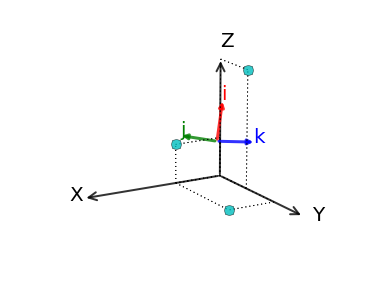

In [6]:
markers = np.vstack((m1, m2, m3))
basis = np.vstack((e1, e2, e3))
CCS(xyz='auto', Oijk=origin, ijk=basis, point=markers, vector=False);

### Gram–Schmidt process

Another equivalent form to calculate a basis based on vectors is knwon as the [Gram–Schmidt process](http://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process). This algorithm is not difficult to implement but we will not see it here because for an anatomical-based coordinate system we will have to explicitly handle the vectors in order to obtain the basis in the desired directions. In addition, for a technical basis it's typical to use more than three markers on the segment to pottentially reduce the effect of the soft tissue artifact and in this case it's used yet another procedure to calculate a basis: the [singular value decomposition (SVD) algorithm](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/SVDalgorithm.ipynb).

## Problems

1. Given the points in the 3D space, m1 = [2,2,0], m2 = [0,1,1], m3 = [1,2,0], find an orthonormal basis.

2. Determine if the following points forma a bais in the 3d space, m1 = [2,2,0], m2 = [1,1,1], m3 = [1,1,0].

## References

- [Standards - International Society of Biomechanics](http://isbweb.org/information-services/standards).

> This page was written in the [IPython Notebook](http://ipython.org/notebook.html).  
To download the notebook click on this option at the top menu or get it from the [github repo](https://github.com/demotu/BMC).